# Explainer notebook for Copenhagen visualizations by Jamie and Valentin

Below is the code and some static graphs used for processing the data used in our project for exploring the city of Copenhagen.
The code is split into the sections that roughly corresponds to the website.

N.B. the code will generate files from the relative path "src/data/" so remember to have the whole project folder downloaded to avoid errors.

## Imports, setup and Introduction
We'll import a data set here that is based on peoples age, their income and the district they live in.

In [1]:
import os, collections, csv
import pandas as pd, matplotlib as mat, matplotlib.pyplot as plt
root_directory = os.path.abspath(os.pardir)
df = pd.read_csv(os.path.join(root_directory, "src","data","kon_alder_bydel_penge.csv"), encoding="utf-8") # reads csv

# Show number of people in each district
print df.groupby(['Bydel'])['Personer'].sum()
lol = df.groupby(['Bydel'])['Personer'].sum()
lol['Amager Vest']

Bydel
Amager Vest                  104830
Amager Øst                    91726
Bispebjerg                    89714
Brønshøj-Husum                68332
Indre By                      86984
Nørrebro                     131694
Valby                         83860
Vanløse                       64988
Vesterbro/Kongens Enghave    100584
Østerbro                     123870
Name: Personer, dtype: int64


104830

Looks good.
We know that there are many tall buildings on Nørrebro and more villas and Brønshøj-Husum

Moving on

## People in age groups listed by districts
Let's try to see the distribution here.
A lot of data processing to calculate the ratio between age groups in different districts.

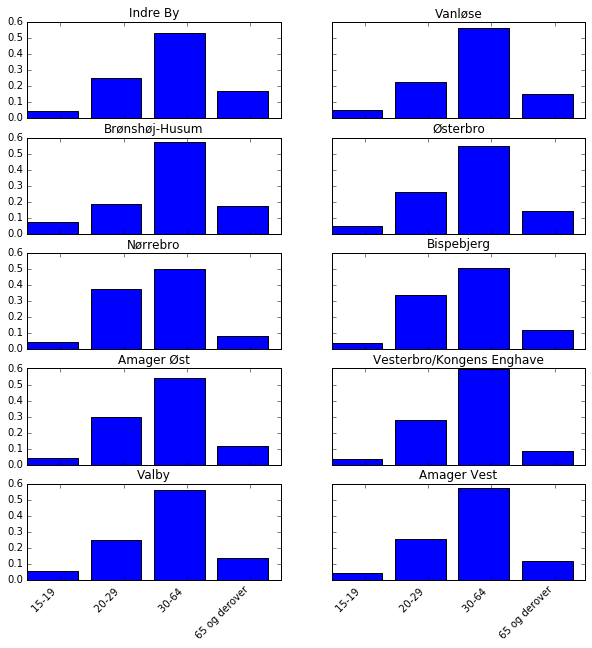

In [2]:
%matplotlib inline
# -*- coding: utf-8 -*-

Districts = df.Bydel.unique()
age_categories = df.Aldersgruppe.unique()

# Total number of people, and people in an age category
total_people = df['Personer'].sum()
people_in_age_category = df.groupby(['Aldersgruppe'])['Personer'].sum().astype(float)

# Create dictionary with ratios
age_category_sum = []
for category in age_categories:
    age_category_sum.append((category, (people_in_age_category[category] / total_people)))
age_category_sum_dict = dict(age_category_sum)


# Three subplots sharing both x/y axes
f, axarr = plt.subplots(5,2, sharey=True, sharex=True, figsize=(10,10))

# Loop through districts and calculate ratio of people living in a district by their age category
index = 0
jj = 0
people_in_districts_as_ratio = {}
for district in Districts:
    people_in_districts_as_ratio[district] = {}
    people_in_district = df[df['Bydel'].isin([district])].groupby(['Aldersgruppe'])['Personer'].sum().astype(float)
    total_people_in_district = people_in_district.sum()
    for category in age_categories:
        try:
            people_in_districts_as_ratio[district][category] = (people_in_district[category] / total_people_in_district)
        except KeyError:
            people_in_districts_as_ratio[district][category] = 0
    
    d_temp = collections.OrderedDict(sorted(people_in_districts_as_ratio[district].items()))
    axarr[index%5, index%2].set_title(district)
    h = axarr[index%5, index%2].bar(range(len(d_temp)), d_temp.values(), color="blue")

    index += 1
    
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0.2)
plt.sca(axarr[0, 1])
plt.xticks(rotation=90)
for ax in f.axes:
    mat.pyplot.sca(ax)
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
    plt.xticks(xticks_pos, age_categories,  ha='right', rotation=45)

# Show the plots!
plt.show()



Okay so we can see here that the age group _30-64 years_ is the highest represented (but also the one spanning the most years, except for _65 and above_, unless we take average length of human lives into account).

Furthermore the distribution looks pretty consistent on all the city districts. There are only slight variations visually noticeable.
E.g. _Nørrebro_ has a lot of people in the _20-29 years_ group compared to _Brønshøj-Husum_ which has a lot fewer. Actually the ratio of _20-29 years_ old is twice as high on _Nørrebro_ than it is in _Brønshøj-Husum_.


In [3]:
# We'll just create a file here to plot the ratios on the webpage
data = pd.DataFrame(people_in_districts_as_ratio)
data.to_csv("personeriprocent.csv", sep=',', encoding="utf-8")

## Average income by district
We could look at the income by age category as well, but we all probably know how that one will look.

Instead let's take a look at the distribution between the different districts.

This is much like the previous code. Slight alterations have been made to account for the new category we're looking at

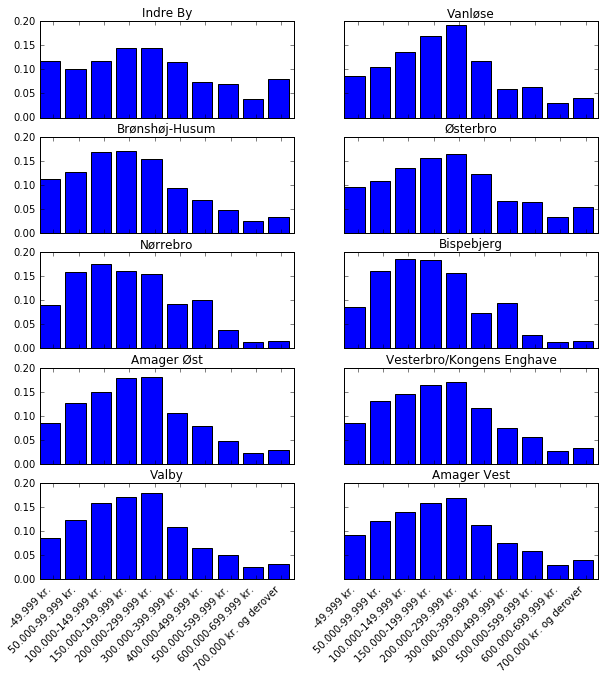

In [4]:
# Create list of categories
income_categories = df.Brutto.unique()

# Three subplots sharing both x/y axes
f, axarr = plt.subplots(5,2, sharey=True, sharex=True, figsize=(10,10))

# Loop through districts and calculate ratio of people living in a district by their age category
index = 0
jj = 0
temp = {}
for district in Districts:
    temp[district] = {}
    income_in_district = df[df['Bydel'].isin([district])].groupby(['Brutto'])['Personer'].sum().astype(float)
    total_people_district = income_in_district.sum()
    for category in income_categories:
        try:
            temp[district][category] = income_in_district[category] / total_people_district
        except KeyError:
            temp[district][category] = 0
    
    d_temp = collections.OrderedDict(sorted(temp[district].items()))
    axarr[index%5, index%2].set_title(district)
    h = axarr[index%5, index%2].bar(range(len(d_temp)), d_temp.values(), color="blue")

    index += 1

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0.2)
plt.sca(axarr[0, 1])
plt.xticks(rotation=90)
for ax in f.axes:
    mat.pyplot.sca(ax)
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
    plt.xticks(xticks_pos, income_categories,  ha='right', rotation=45)

# Show the plots!
plt.show()

At a first glance it looks normally distributed with a positive skew for most of the districts.
There is though a huge difference between the wealthiest and the poorest districts. 
Let's try to see the same chart with only the 3 highest income intervals

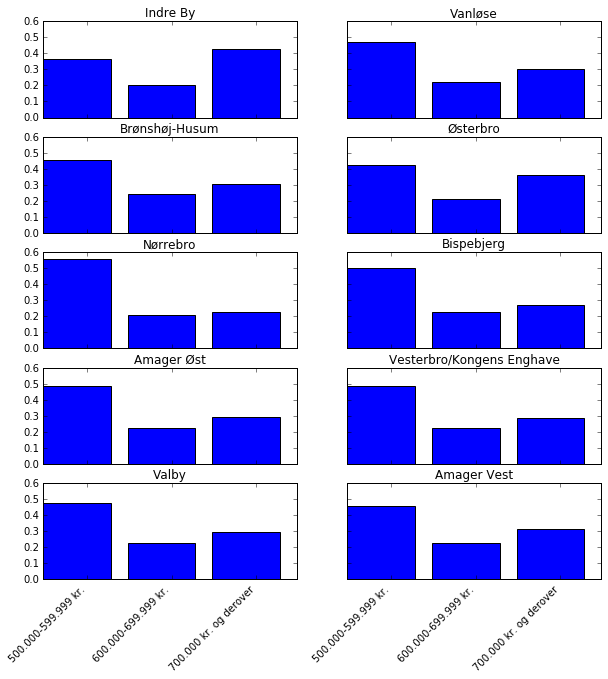

In [5]:
# Create list of categories
income_categories = df.Brutto.unique()[-3:]


# Three subplots sharing both x/y axes
f, axarr = plt.subplots(5,2, sharey=True, sharex=True, figsize=(10,10))

# Loop through districts and calculate ratio of people living in a district by their age category
index = 0
jj = 0
temp = {}
for district in Districts:
    temp[district] = {}
    income_in_district = df[((df.Kategori == 8) 
                   | (df.Kategori == 9)
                   | (df.Kategori == 10))
                   & df['Bydel'].isin([district])].groupby(['Brutto'])['Personer'].sum().astype(float)
    total_people_district = income_in_district.sum()
    for category in income_categories:
        try:
            temp[district][category] = income_in_district[category] / total_people_district
        except KeyError:
            temp[district][category] = 0
    
    d_temp = collections.OrderedDict(sorted(temp[district].items()))
    axarr[index%5, index%2].set_title(district)
    h = axarr[index%5, index%2].bar(range(len(d_temp)), d_temp.values(), color="blue")

    index += 1

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0.2)
plt.sca(axarr[0, 1])
plt.xticks(rotation=90)
for ax in f.axes:
    mat.pyplot.sca(ax)
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
    plt.xticks(xticks_pos, income_categories,  ha='right', rotation=45)

# Show the plots!
plt.show()